In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
detector=mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)
def detect_face(frame):
    bounding_boxes=[]
    results = detector.process(frame)
    if results.detections:
        height,width,_=frame.shape
        for detection in results.detections:
            bb=detection.location_data.relative_bounding_box
            x1=max(0,bb.xmin*width)
            y1=max(0,bb.ymin*height)
            x2=min(width,(bb.xmin+bb.width)*width)
            y2=min(height,(bb.ymin+bb.height)*height)
            bbox=np.array([x1,y1,x2,y2])
            bounding_boxes.append(bbox)

    return bounding_boxes

In [3]:
from hsemotion_onnx.facial_emotions import HSEmotionRecognizer
#model_name='enet_b0_8_best_afew'
model_name='enet_b0_8_best_vgaf'
#model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name)

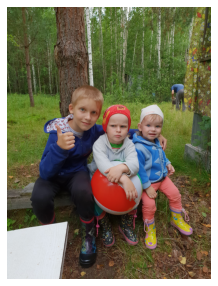

In [4]:
fpath='20180720_174416.jpg'
frame_bgr = cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame)

bounding_boxes=detect_face(frame)

Contempt [-2.8882391   3.759581   -3.4538617  -1.2803922   3.664761    2.1304247
  0.25463906  0.9497273 ]
Anger [ 5.345763   -1.5420196   1.1584865   2.6180632  -6.394527    0.23759913
  4.094389   -2.230703  ]
Fear [-2.3169613  -0.74808043  0.16960259  3.634499    0.8901966  -0.19835863
  0.92111814  2.5349996 ]


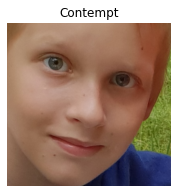

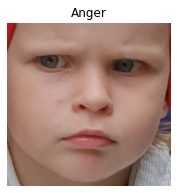

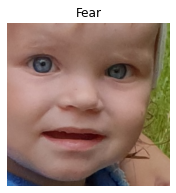

In [5]:
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    emotion,scores=fer.predict_emotions(face_img,logits=True)
    print(emotion,scores)
    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)

['Contempt', 'Anger', 'Fear'] [[5.88298310e-04 4.53637928e-01 3.34157288e-04 2.93681608e-03
  4.12600309e-01 8.89560953e-02 1.36311473e-02 2.73152590e-02]
 [7.27666378e-01 7.42345583e-04 1.10514965e-02 4.75671627e-02
  5.79681318e-06 4.40032687e-03 2.08193600e-01 3.72833310e-04]
 [1.69883273e-03 8.15655943e-03 2.04198062e-02 6.52885497e-01
  4.19760495e-02 1.41334487e-02 4.32942994e-02 2.17435509e-01]]


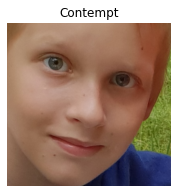

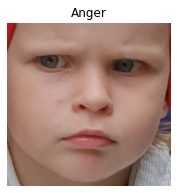

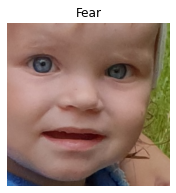

In [6]:
face_img_list=[]
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    face_img_list.append(face_img)

emotions,scores=fer.predict_multi_emotions(face_img_list,logits=False)
print(emotions,scores)

for face_img,emotion in zip(face_img_list,emotions):    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)